<a href="https://colab.research.google.com/github/AtharvaTambat/WnCC-SoC-2022-QML/blob/main/Quantum_Phase_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Quantum Phase Estimation**

In [202]:
import matplotlib.pyplot as plt
import math
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = AerSimulator()

In [203]:
# Here, we consider U = 
#[1  0          ]
#[0  e^{i*theta}] 
theta = math.pi/6.0

# Eigenvector of this gate is |1>

# Function for computing Inverse Quantum Fourier Transform
def inverse_qft(n):

  circuit.barrier()

  for i in range(int(n/2)):
    circuit.swap(i,n-i-1)

  for i in range(n):
    for j in range(0,i):
      circuit.cp(-math.pi/(2**(i-j)),n-1-j,n-i-1)
    circuit.h(n-i-1)   
    circuit.barrier()


# The main circuit for Quantum Phase Estimation starts here
t = 7                           # The number of qubits to estimate the phase with greater accuracy in a single shot

circuit = QuantumCircuit(t+1,t)

circuit.x(t)       # The second register needs to contain eigenvector of the U gate 
circuit.barrier()

for i in range(t):
  circuit.h(i)

for i in range(t):
  circuit.cp((theta)*(2**(t-i-1)),i,t)    # Each gate adds an additional phase of e^{i*2^{i}*phi}, here, in our demonstration, phi = PI/4


inverse_qft(t)  # Take the inverse quantum fourier transform of the first quantum register
# After the Inverse Quantum Fourier Transform of the first register, we should get the state |2^{t}phi> - in binary form (m_0 m_1 m_2....m_{t-1}) in the first qubit register
# where, m_i - is the measurment of the qubit q_i

#NOTE: The graph shows the qubits in the order (q_t q_{t-1}...q_0), ie in reverse order.
circuit.measure(range(t),range(t))

circuit.draw()

░ ┌───┐                                                             »
q_0: ──────░─┤ H ├─■───────────────────────────────────────────────────────────»
           ░ ├───┤ │                                                           »
q_1: ──────░─┤ H ├─┼──────────■────────────────────────────────────────────────»
           ░ ├───┤ │          │                                                »
q_2: ──────░─┤ H ├─┼──────────┼──────────■─────────────────────────────────────»
           ░ ├───┤ │          │          │                                     »
q_3: ──────░─┤ H ├─┼──────────┼──────────┼─────────■───────────────────────────»
           ░ ├───┤ │          │          │         │                           »
q_4: ──────░─┤ H ├─┼──────────┼──────────┼─────────┼─────────■─────────────────»
           ░ ├───┤ │          │          │         │         │                 »
q_5: ──────░─┤ H ├─┼──────────┼──────────┼─────────┼─────────┼─────────■───────»
           ░ ├───┤ │          │          │         │         │         │       »
q_6: ──────░─┤ H ├─┼──────────┼──────────┼─────────┼─────────┼─────────┼───────»
     ┌───┐ ░ └───┘ │P(33.51)  │P(16π/3)  │P(8π/3)  │P(4π/3)  │P(2π/3)  │P(π/3) »
q_7: ┤ X ├─░───────■──────────■──────────■─────────■─────────■─────────■───────»
     └───┘ ░                                                                   »
c: 7/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«               ░             ░                 ░                           ░ »
«q_0: ──────────░──X──────────░─────────────────░───────────────────────────░─»
«               ░  │          ░                 ░                           ░ »
«q_1: ──────────░──┼───X──────░─────────────────░───────────────────────────░─»
«               ░  │   │      ░                 ░                           ░ »
«q_2: ──────────░──┼───┼───X──░─────────────────░───────────────────────────░─»
«               ░  │   │   │  ░                 ░                           ░ »
«q_3: ──────────░──┼───┼───┼──░─────────────────░───────────────────────────░─»
«               ░  │   │   │  ░                 ░                     ┌───┐ ░ »
«q_4: ──────────░──┼───┼───X──░─────────────────░──■─────────■────────┤ H ├─░─»
«               ░  │   │      ░           ┌───┐ ░  │         │P(-π/2) └───┘ ░ »
«q_5: ──────────░──┼───X──────░──■────────┤ H ├─░──┼─────────■──────────────░─»
«               ░  │ ┌───┐    ░  │P(-π/2) └───┘ ░  │P(-π/4)                 ░ »
«q_6: ─■────────░──X─┤ H ├────░──■──────────────░──■────────────────────────░─»
«      │P(π/6)  ░    └───┘    ░                 ░                           ░ »
«q_7: ─■────────░─────────────░─────────────────░───────────────────────────░─»
«               ░             ░                 ░                           ░ »
«c: 7/════════════════════════════════════════════════════════════════════════»
«                                                                             »
«                                         ░                                »
«q_0: ────────────────────────────────────░────────────────────────────────»
«                                         ░                                »
«q_1: ────────────────────────────────────░────────────────────────────────»
«                                         ░                                »
«q_2: ────────────────────────────────────░──■──────────■─────────■────────»
«                                   ┌───┐ ░  │          │         │        »
«q_3: ─■─────────■─────────■────────┤ H ├─░──┼──────────┼─────────┼────────»
«      │         │         │P(-π/2) └───┘ ░  │          │         │P(-π/4) »
«q_4: ─┼─────────┼─────────■──────────────░──┼──────────┼─────────■────────»
«      │         │P(-π/4)                 ░  │          │P(-π/8)           »
«q_5: ─┼─────────■────────────────────────░──┼──────────■──────────────────»
«      │P(-π/8)             

Total count for possible combinations of output are:  {'1101100': 1, '1100100': 1, '0011111': 1, '0101011': 1, '0100100': 3, '0100011': 1, '1000010': 1, '0011100': 1, '1110100': 1, '1100000': 5, '0111000': 7, '1010000': 3, '0010100': 1, '0100000': 1, '0101000': 163, '1110000': 6, '0000100': 2, '1101111': 2, '1101000': 706, '0011000': 38, '1000000': 3, '1001000': 30, '1011000': 17, '0010000': 1, '1110010': 1, '0001000': 16, '1111000': 4, '1111100': 2, '0001100': 2, '0110000': 3}


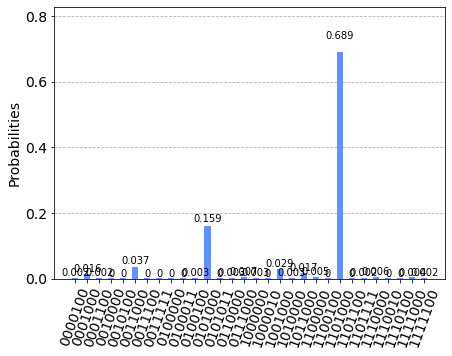

In [204]:
# Compiling the circuit
compiled_circuit = transpile(circuit, simulator)

shots = 1000000
# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("Total count for possible combinations of output are: ", counts)

# Plot a histogram
plot_histogram(counts)


In [205]:
# Prints the binary output with maximum probability
max_key = max(counts, key=counts.get)

max_key = max_key[::-1]

print("The binary value of theta/(2*PI):",max_key)
# Prints the phase angle represented by the binary output
iterations = range(len(max_key))
max_key = int(max_key)

num = 0
for i in iterations:
  num = num + (2**i)*(max_key%10)
  max_key = int(max_key/10)

print("The value of theta:",2*math.pi*num/(2**t))

error = (theta - 2*math.pi*num/(2**t))/theta*100
print("Error (in %):",error)

The binary value of theta/(2*PI): 0001011
The value of theta: 0.5399612373357456
Error (in %): -3.1249999999999964
